In [147]:
import pandas as pd
from datetime import datetime

In [148]:
pd

<module 'pandas' from '/opt/anaconda3/lib/python3.7/site-packages/pandas/__init__.py'>

In [149]:
import numpy as np

In [150]:
import seaborn as sns

In [151]:
import matplotlib 

In [152]:
import matplotlib.pyplot as plt

In [153]:
import calendar

In [154]:
%matplotlib inline
sns.set_context('poster')

In [155]:
from itertools import cycle, islice

In [156]:
df = pd.read_csv(r'/Users/student/Documents/GitHub/nyu_arise_noise_2020/data/sonyc_2020-06-20.csv')
# Data from this chart is not from every single day. Otherwise, there would be many more rows

In [157]:
# Making new dataframe based on the original
sensor_df = df[df['public_id'] == 2]
# Set index to date column
sensor_df = sensor_df.set_index('date')

In [158]:
# Convert index to "DateTimeIndex"
sensor_df.index # Check index type
# Convert continued
pd.to_datetime(sensor_df.index)
sensor_df.index = pd.to_datetime(sensor_df.index)

In [159]:
data_days = len(sensor_df) / 24

In [160]:
# Redcue demial place of number
print('Number of days in sensor dataframe:', data_days)
# Shows length of data in days

Number of days in sensor dataframe: 405.7916666666667


In [161]:
# Reduce decimal place of number
data_years = data_days / 365
print('Number of years in sensor dataframe:', data_years)
# Shows length of data in years

Number of years in sensor dataframe: 1.1117579908675799


In [162]:
# Creating columns for date information (year, month, week, day, etc.)
sensor_df['year'] = sensor_df.index.year
sensor_df['month'] = sensor_df.index.month
# Monday = 0, Sunday = 6
sensor_df['day_of_week'] = sensor_df.index.dayofweek
# Adding the name of the day in the week
sensor_df['week_day_string'] = sensor_df.index.day_name().str.slice(start=0, stop=3)

In [163]:
sensor_df

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week,week_day_string
date,,,,,,,,,,,,,,,,,,,
2017-03-01 00:00:00,40.730329,-73.998697,541.0,2.445,73.600,65.684,67.990,54.510,64.544,97.87,52.26,2,45.61,1.360,4.724,2017,3,2,Wed
2017-03-01 01:00:00,40.730329,-73.998697,541.0,3.230,71.220,64.290,66.380,53.490,62.161,95.78,51.66,2,44.12,1.658,4.458,2017,3,2,Wed
2017-03-01 02:00:00,40.730329,-73.998697,541.0,9.188,71.571,60.840,64.900,52.875,61.284,89.58,50.81,2,38.77,2.677,4.037,2017,3,2,Wed
2017-03-01 03:00:00,40.730329,-73.998697,541.0,8.966,69.911,59.250,64.150,52.070,59.261,83.24,49.94,2,33.30,2.761,3.873,2017,3,2,Wed
2017-03-01 04:00:00,40.730329,-73.998697,541.0,7.773,71.950,60.904,65.012,52.530,60.815,86.41,50.64,2,35.77,2.570,4.212,2017,3,2,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-11 13:00:00,40.730329,-73.998697,541.0,6.003,70.890,63.755,66.130,58.540,62.204,83.80,55.77,2,28.03,1.977,2.529,2020,6,3,Thu
2020-06-11 14:00:00,40.730329,-73.998697,541.0,21.366,68.020,63.180,64.060,59.550,62.116,90.21,56.80,2,33.41,3.130,1.820,2020,6,3,Thu
2020-06-11 15:00:00,40.730329,-73.998697,541.0,4.576,65.980,62.790,63.550,57.450,60.920,87.26,54.66,2,32.60,0.970,2.185,2020,6,3,Thu


In [164]:
# Only return the values from the original sensor_df where the date is 2019
sensor_df_2019 = sensor_df[sensor_df['year'] == 2019]
sensor_df_2019

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week,week_day_string
date,,,,,,,,,,,,,,,,,,,
2019-03-01 00:00:00,40.730329,-73.998697,541.0,15.105,68.341,58.700,60.320,53.06,59.008,88.91,50.74,2,38.17,2.933,2.971,2019,3,4,Fri
2019-03-01 01:00:00,40.730329,-73.998697,541.0,2.810,66.090,61.940,63.160,52.61,58.563,81.86,50.18,2,31.68,1.409,3.576,2019,3,4,Fri
2019-03-01 02:00:00,40.730329,-73.998697,541.0,10.101,70.279,59.123,61.170,51.91,58.867,86.35,49.79,2,36.56,2.611,3.577,2019,3,4,Fri
2019-03-01 03:00:00,40.730329,-73.998697,541.0,20.106,66.181,56.850,59.050,51.92,57.435,82.80,49.61,2,33.19,3.603,2.856,2019,3,4,Fri
2019-03-01 04:00:00,40.730329,-73.998697,541.0,11.181,65.060,56.680,58.370,51.89,55.421,74.25,49.18,2,25.07,2.706,2.486,2019,3,4,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-19 19:00:00,40.730329,-73.998697,541.0,0.013,73.210,69.040,70.600,59.68,65.960,83.65,55.17,2,28.48,0.354,3.628,2019,6,2,Wed
2019-06-19 20:00:00,40.730329,-73.998697,541.0,6.640,69.790,61.240,64.640,55.27,60.146,84.24,52.39,2,31.85,2.192,3.086,2019,6,2,Wed
2019-06-19 21:00:00,40.730329,-73.998697,541.0,8.252,62.540,58.930,59.883,54.93,57.244,76.38,52.97,2,23.41,1.919,1.776,2019,6,2,Wed


In [165]:
# Filtering data for 1 week
# Start and end dates
start_date = '2019-03-03'
end_date = '2019-03-10'

# Setting the 'mask' function
mask = (sensor_df_2019.index > start_date) & (sensor_df_2019.index <= end_date)

In [166]:
#Assigning Mask
# Must create a new dataframe to pull data from other dataframes,
# Such as sensor_df_2019
sensor_df_week = sensor_df_2019.loc[mask]
# sensor_df_week

In [167]:
# Creating new dataframe called "daily_summary" 
daily_summary = pd.DataFrame()
# Resampling hourly sensor dataframe to mean daily decibel levels
daily_summary = sensor_df_2019.resample('D').mean()
# Downsampled from decibel levels per hour to decibel levels to day
daily_summary

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week
date,,,,,,,,,,,,,,,,,,
2019-03-01,40.730329,-73.998697,541.0,9.705083,70.371958,61.037542,63.546958,54.306083,60.520250,84.330833,51.526250,2,32.804583,2.418625,3.328917,2019,3,4
2019-03-02,40.730329,-73.998697,541.0,6.468875,68.075083,60.128708,62.744250,52.475000,58.871625,81.837083,49.617083,2,32.220000,1.924375,3.482875,2019,3,5
2019-03-03,40.730329,-73.998697,541.0,5.315208,68.799708,61.318500,63.741750,53.324208,59.423917,80.908750,50.652917,2,30.255833,1.768417,3.530125,2019,3,6
2019-03-04,40.730329,-73.998697,541.0,5.936042,68.959083,60.803750,63.132583,53.627917,59.247667,81.801667,50.812917,2,30.988750,1.927208,3.318208,2019,3,0
2019-03-05,40.730329,-73.998697,541.0,6.158875,67.502250,60.068333,62.557542,52.512917,58.311875,81.182500,49.477500,2,31.705000,1.949083,3.392292,2019,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-15,40.730329,-73.998697,541.0,7.306750,70.569833,62.789917,65.048917,56.089792,61.468333,84.271250,53.181250,2,31.090000,2.010292,3.125125,2019,6,5
2019-06-16,40.730329,-73.998697,541.0,7.982458,68.300917,61.088750,63.100917,55.186250,59.614125,81.717083,52.690833,2,29.026250,2.121500,2.802667,2019,6,6
2019-06-17,40.730329,-73.998697,541.0,8.199792,70.302167,63.056833,65.154583,56.529583,61.532583,84.953333,53.695000,2,31.258333,2.063500,3.003708,2019,6,0


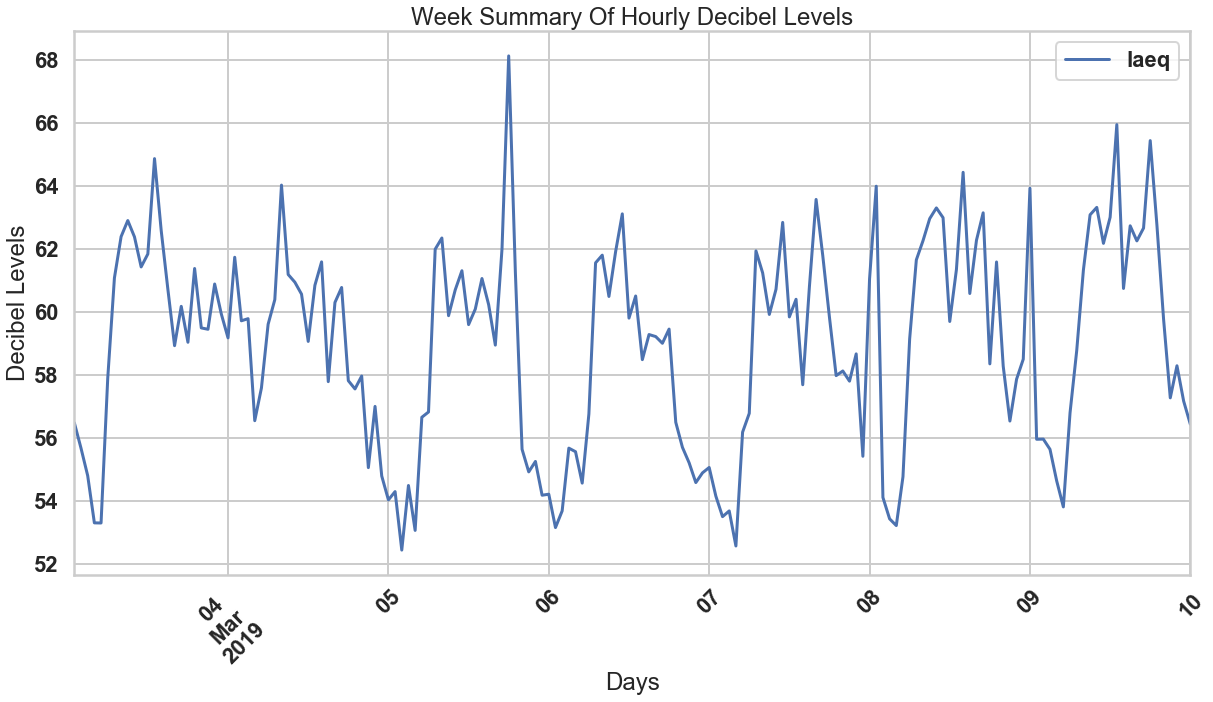

In [168]:
# Making hourly plot
ax = sensor_df_week.plot(y='laeq', title='Week Summary Of Hourly Decibel Levels', figsize=(20,10), grid=True, rot=45)
ax.set_xlabel("Days")
ax.set_ylabel("Decibel Levels")
ax.grid('on', which='minor', axis='x')
ax.grid('off', which='major', axis='x')
xtick = pd.date_range(start=sensor_df_week.index.min().date(), end=sensor_df_week.index.max().date(), freq='D')

In [169]:
# Downsampling to make plot by day
# Creating new dataframe called "week_daily" for weekly plot,
# downsampled to days
week_daily = pd.DataFrame()
# Resample hourly dataframe to mean daily decibel levels (From the filtered week)
week_daily = sensor_df_week.resample('D').mean()
week_daily

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week
date,,,,,,,,,,,,,,,,,,
2019-03-03,40.730329,-73.998697,541.0,5.291217,69.132739,61.507565,63.987478,53.375696,59.610087,81.140870,50.712174,2,30.428696,1.776609,3.591609,2019,3,6
2019-03-04,40.730329,-73.998697,541.0,5.936042,68.959083,60.803750,63.132583,53.627917,59.247667,81.801667,50.812917,2,30.988750,1.927208,3.318208,2019,3,0
2019-03-05,40.730329,-73.998697,541.0,6.158875,67.502250,60.068333,62.557542,52.512917,58.311875,81.182500,49.477500,2,31.705000,1.949083,3.392292,2019,3,1
2019-03-06,40.730329,-73.998697,541.0,7.720708,67.220125,59.116417,61.557792,52.157083,57.721042,80.291250,49.137500,2,31.153750,2.145333,3.254667,2019,3,2
2019-03-07,40.730329,-73.998697,541.0,7.860625,68.575250,59.569875,62.255667,52.274000,58.360375,81.909583,49.385000,2,32.524583,2.242042,3.465708,2019,3,3
2019-03-08,40.730329,-73.998697,541.0,4.971083,69.415667,61.862625,64.205625,53.458125,59.815875,81.316667,50.317500,2,30.999167,1.704083,3.685625,2019,3,4
2019-03-09,40.730329,-73.998697,541.0,6.361292,69.943375,61.706167,64.251750,54.030000,60.147833,82.245833,51.073333,2,31.172500,1.980458,3.502833,2019,3,5
2019-03-10,40.730329,-73.998697,541.0,8.502000,61.801000,57.970000,58.810000,53.910000,56.444000,76.090000,50.990000,2,25.100000,1.717000,1.812000,2019,3,6


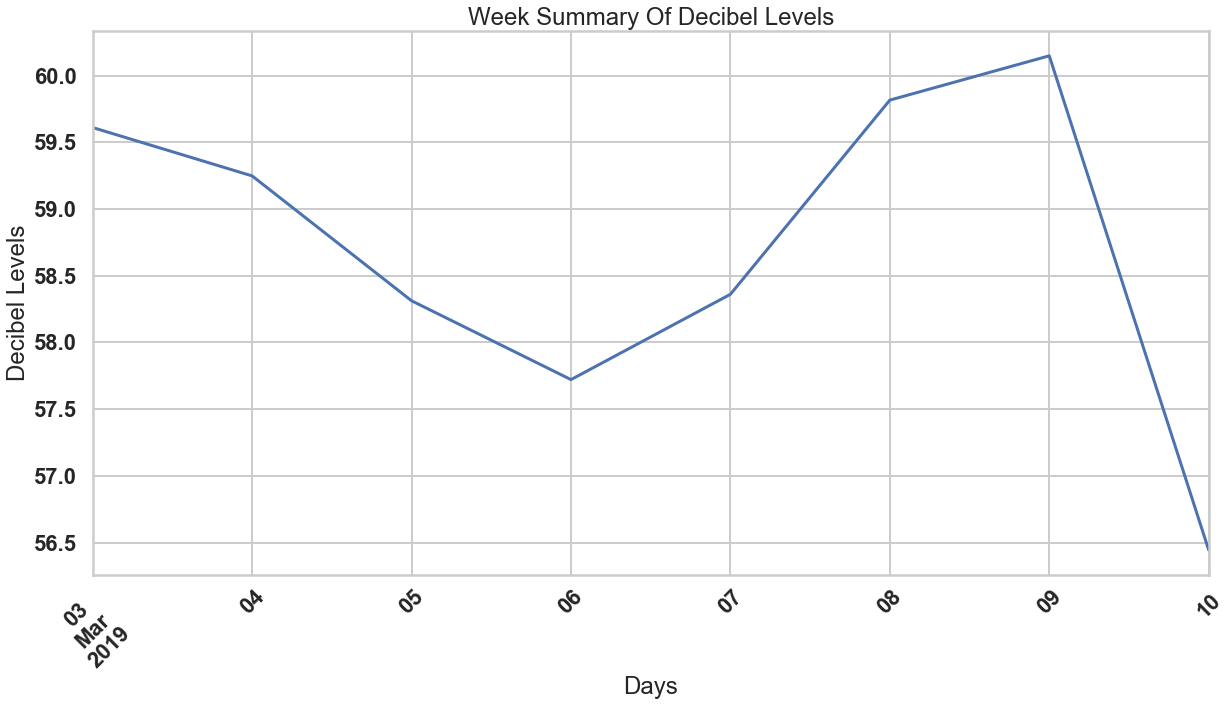

In [170]:
# Labeled plot with ax
# 'figsize' makes it bigger!
# 'xtick' and 'ax.grid' for grid!
ax = week_daily.plot(y='laeq', title='Week Summary Of Decibel Levels', figsize=(20,10), grid=True, 
                      rot=45, legend=False)
ax.set_xlabel("Days")
ax.set_ylabel("Decibel Levels")
xtick = pd.date_range(start=week_daily.index.min().date(), end=week_daily.index.max().date(), freq='D')
ax.set_xticks(xtick, minor=True )
ax.grid('on', which='minor', axis='x')
ax.grid('off', which='major', axis='x')

font = {'family' : 'sans-serif',
       'weight' : 'bold',
       'size'   : 22}

matplotlib.rc('font', **font)

# Display the day of the week
# Convert to bar plot

[Text(0, 0, '2019-03-03-Sun'),
 Text(0, 0, '2019-03-04-Mon'),
 Text(0, 0, '2019-03-05-Tue'),
 Text(0, 0, '2019-03-06-Wed'),
 Text(0, 0, '2019-03-07-Thu'),
 Text(0, 0, '2019-03-08-Fri'),
 Text(0, 0, '2019-03-09-Sat'),
 Text(0, 0, '2019-03-10-Sun')]

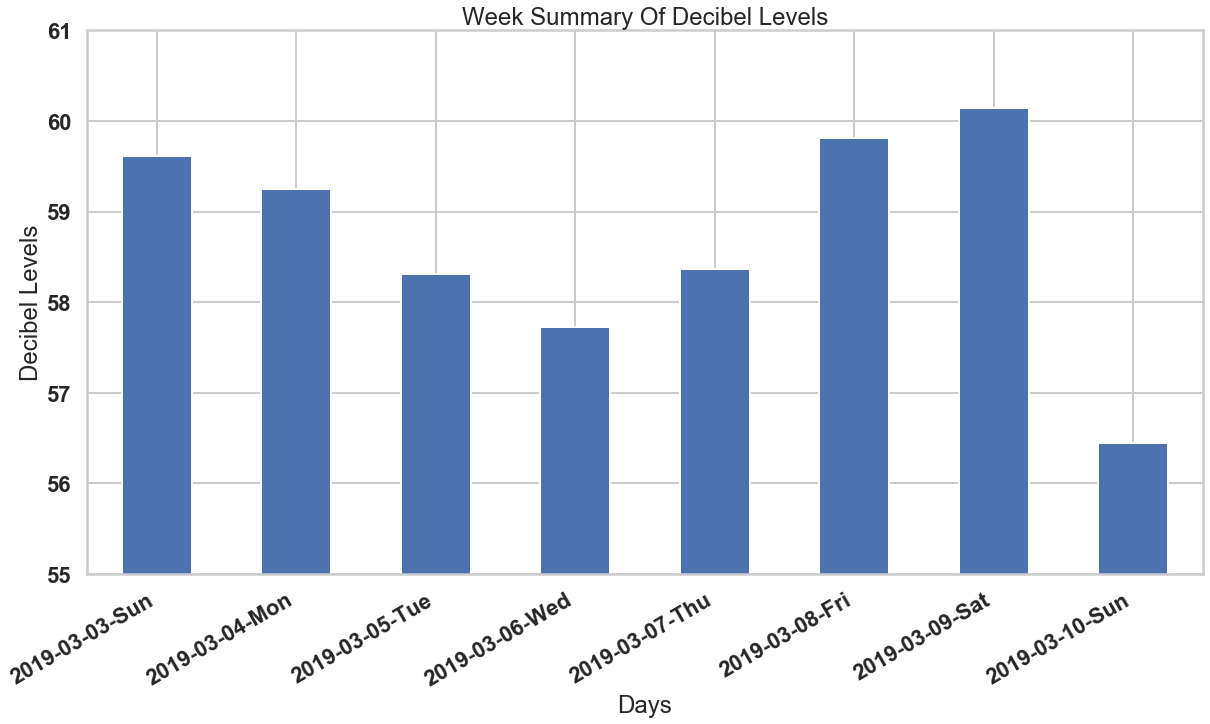

In [171]:
# Bar plot version
ax = week_daily.plot.bar(y='laeq', title='Week Summary Of Decibel Levels', figsize=(20,10), rot=45, legend=False)
ax.set_xlabel("Days")
ax.set_ylabel("Decibel Levels")
ax.set_ylim(55,61)
x_dates = week_daily.index.strftime('%Y-%m-%d-%a')
ax.set_xticklabels(labels=x_dates, rotation=30, ha='right')

# Display day of week
# Include the min and max columns from dataframe 

[Text(0, 0, '2019-03-03 Sun'),
 Text(0, 0, '2019-03-04 Mon'),
 Text(0, 0, '2019-03-05 Tue'),
 Text(0, 0, '2019-03-06 Wed'),
 Text(0, 0, '2019-03-07 Thu'),
 Text(0, 0, '2019-03-08 Fri'),
 Text(0, 0, '2019-03-09 Sat'),
 Text(0, 0, '2019-03-10 Sun')]

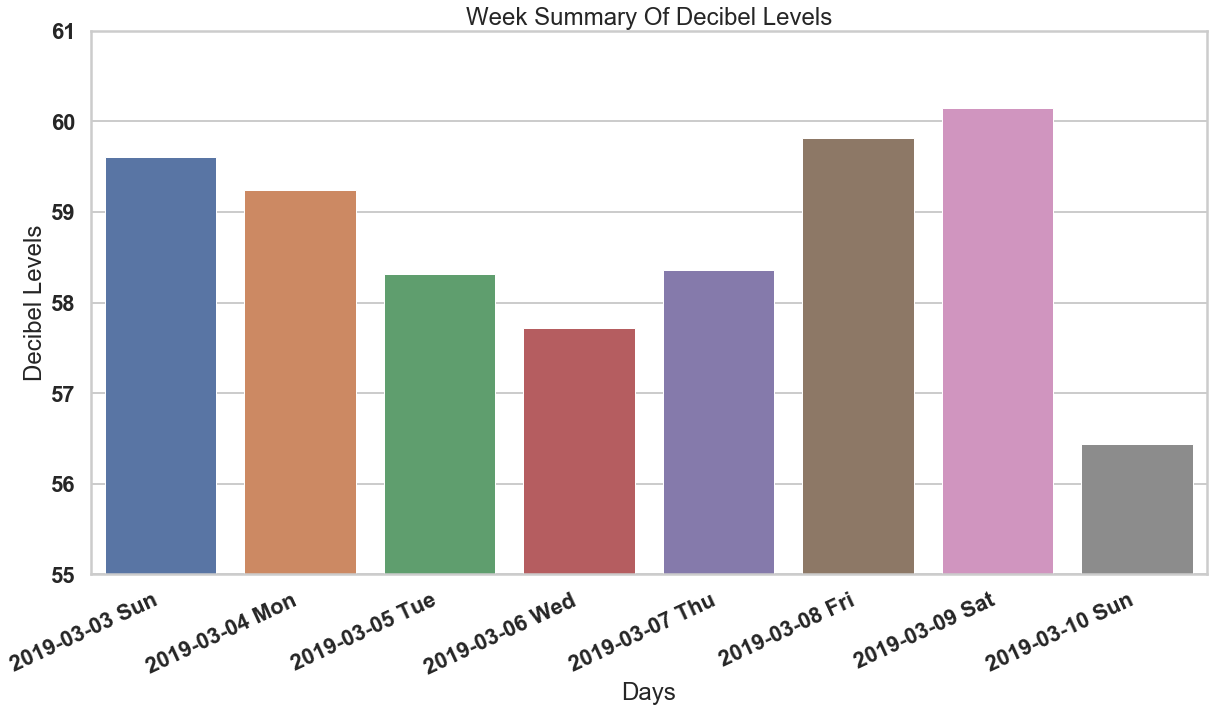

In [172]:
# Bar plot with seaborn

plt.figure(figsize=(20, 10))
plt.title('Week Summary Of Decibel Levels')
sns.set(style="whitegrid", font_scale=3)
ax = sns.barplot(x=week_daily.index, y='laeq', data=week_daily)
ax.set_xlabel("Days")
ax.set_ylabel("Decibel Levels")
ax.set_ylim(55,61)
x_dates = week_daily.index.strftime('%Y-%m-%d %a')
ax.set_xticklabels(labels=x_dates, rotation=25, ha='right')

# Draft questions
# Look into groupby